In [2]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

import torch
import numpy as np
import json
from tools import latex, latex_plot_func

from tools.camera_lens import CameraLens

path = "/home/kevin/Documents/master-thesis/thesis/figures/plots"

train_data = latex_plot_func.load_train_data()

{'train_train_loss': {'min': 0.000773731735534966, 'max': 0.7079254388809204}, 'val_acc': {'min': 0, 'max': 100}, 'val_mse': {'min': 0.0010073757730424404, 'max': 0.7173811197280884}}


In [3]:
training_plot_size = 0.65
plot_metrics = [
    # "train_train_loss",
    "val_acc",
    "val_mse"
]

def plot_training(filename, clamp=None, *args, **kwargs):
    for metric in plot_metrics:
        with latex.plot_latex(filename=filename + "_" + metric, target_size=training_plot_size):
            latex_plot_func.plot_training(train_data, metric, clamp=clamp if metric == "val_mse" else None, *args, **kwargs)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


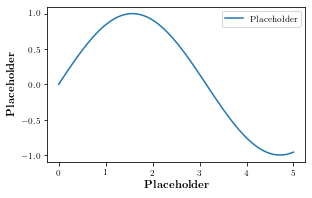

In [7]:
# Placeholder
x = np.linspace(0, 5, 100)
y = np.sin(x)

data = {"x": [x], "y": [y], "label": ["Placeholder"]}

with latex.plot_latex(xlabel="Placeholder", ylabel="Placeholder", filename="placeholder", target_size=0.8):
    latex.plot_data(data)

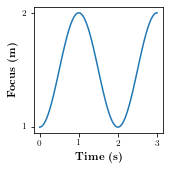

In [21]:
x = np.linspace(0, 3, 100)
y = -0.5 * np.cos(x * np.pi) + 1.5
blur_imgs = [Image.open(os.path.join(path, "blur_seq", f"{i}.png")) for i in range(3)]

with latex.plot_latex(xlabel="Time (s)", ylabel="Focus (m)", filename="vid_sweep_concept", target_size=[0.4, 0.4]):
    plt.xticks(range(3+1))
    plt.yticks([1, 2])
    plt.plot(x, y)

Lens: {'focal_length': 0.004200000000000001, 'depth_scale': 1, 'sensor_size_full': array([0.005645, 0.004435]), 'f_number': 1.7, 'aperture_diameter': 0.002470588235294118, 'resolution': (1, 1), 'aspect_ratio': 1.0, 'sensor_size': [0.005645, 0.005645], 'fov': [1.1834044608125198, 1.1834044608125198]}


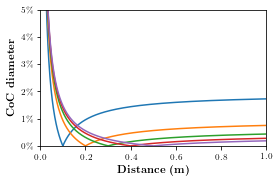

In [33]:
# s7 coc
with latex.plot_latex(xlabel="Distance (m)", ylabel="CoC diameter", filename="coc_plot_s7", 
                      xlim=(0, 1), ylim=(0, 0.05), target_size=0.7):
    latex_plot_func.plot_coc(
        CameraLens(
            focal_length=4.2 / 1000,
            f_number=1.7,
            sensor_size_full=np.array([5.645, 4.435]) / 1000
        ),
        focus_dists=np.linspace(0.1, 0.5, 5),
        rel_coc=True
    )

Lens: {'focal_length': 0.022, 'depth_scale': 1, 'sensor_size_full': array([0.0236, 0.0158]), 'f_number': 3.5, 'aperture_diameter': 0.006285714285714285, 'resolution': (1, 1), 'aspect_ratio': 1.0, 'sensor_size': [0.023600000000000003, 0.023600000000000003], 'fov': [0.9846271791301731, 0.9846271791301731]}


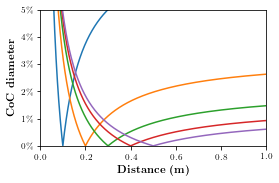

In [34]:
# s7 dslr
with latex.plot_latex(xlabel="Distance (m)", ylabel="CoC diameter", filename="coc_plot_dslr", 
                      ylim=(0, 0.05), target_size=0.7):
    latex_plot_func.plot_coc(
        CameraLens(
            focal_length=22 / 1000,
            f_number=3.5,
            sensor_size_full=np.array([23.6, 15.8]) / 1000
        ),
        focus_dists=np.linspace(0.1, 0.5, 5),
        rel_coc=True
    )

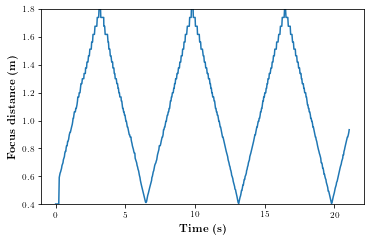

In [12]:
root_dir = "/home/kevin/Documents/master-thesis/datasets/andasus_dataset/synced"
clip_folder = "clip1"

with open(os.path.join(root_dir, clip_folder, "params.json"), "r") as f:
    clip_params = json.load(f)
    
timestamps = [f["time"] for f in clip_params["frames"]]
focus_sets = [f["focus"] for f in clip_params["frames"]]

with latex.plot_latex(xlabel="Time (s)", ylabel="Focus distance (m)", filename="andasus_focdists", 
                      target_size=1, ylim=(0.4, 1.8)):
    plt.plot(timestamps, focus_sets)

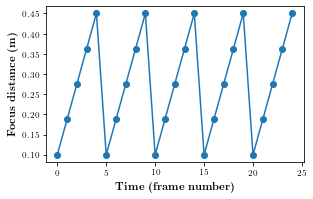

In [15]:
y = list(np.linspace(0.1, 0.45, 5)) * 5 
x = range(len(y))

with latex.plot_latex(xlabel="Time (frame number)", ylabel="Focus distance (m)", filename="blender_focdists", 
                      target_size=0.8):
    plt.plot(x, y, "-o")

(70, 2000)


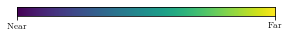

In [4]:
cmap_res = [2000, 70]

cmap_img = np.repeat(np.linspace(0, 1, cmap_res[0])[None, :], cmap_res[1], axis=0)

print(cmap_img.shape)

with latex.plot_latex(filename="colormap", target_size=0.8, dpi=1000):
    plt.yticks([])
    plt.xticks((0, cmap_res[0] - 1), ("Near", "Far"))
    plt.imshow(cmap_img)

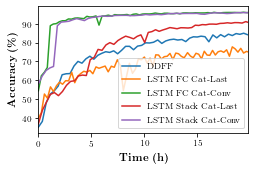

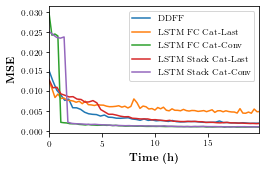

In [42]:
plot_training(
    filename="lstm_ddff",
    models=[
        "m109375_ddffnew_do_last",
        "m109419_ddffnew_rnn_fc_cclast",
        "m109417_ddffnew_rnn_fc_ccconv",
        "m109418_ddffnew_rnn_stack_cclast",
        "m109416_ddffnew_rnn_stack_ccconv"
    ],
    labels=[
        "DDFF",
        "LSTM FC Cat-Last",
        "LSTM FC Cat-Conv",
        "LSTM Stack Cat-Last",
        "LSTM Stack Cat-Conv"
    ]
)

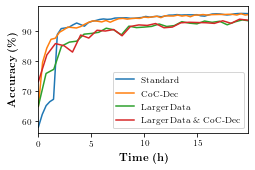

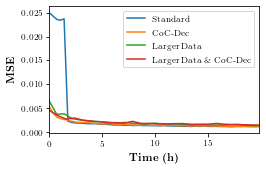

In [43]:
# LSTM Stack Cat-Conv types
plot_training(
    filename="lstm_ddff_coc_big",
    models=[
        "m109416_ddffnew_rnn_stack_ccconv",
        "m111494_ddffnew_rnn_stack_ccconv_cocdepth",
        "m111495_ddffnew_rnn_stack_ccconv_big",
        "m111497_ddffnew_rnn_stack_ccconv_big_cocdepth"
    ],
    labels=[
        "Standard",
        "CoC-Dec",
        "Larger Data",
        "Larger Data \& CoC-Dec"
    ]
)

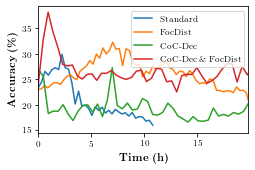

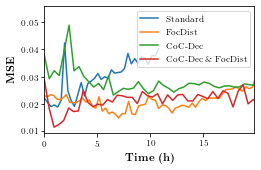

In [4]:
plot_training(
    filename="pool",
    models=[
        "m109475_poolnew_dir_noch",
        "m109520_poolnew_dir_focdist",
        "m109514_poolnew_dir_noch_2dec",
        "m109517_poolnew_dir_focdist_2dec"
    ],
    labels=[
        "Standard",
        "FocDist",
        "CoC-Dec",
        "CoC-Dec \& FocDist"
    ],
    clamp=0.3
)

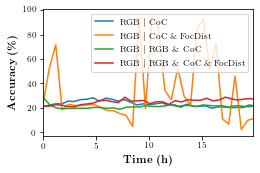

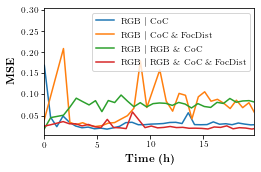

In [5]:
# poolpool
plot_training(
    filename="poolpool",
    models=[
        "m109921_poolpoolnew_rgb_coc",
        "m109521_poolpoolnew_rgb_foccoc",
        "m109920_poolpoolnew_rgb_rgbcoc",
        "m109919_poolpoolnew_rgb_rgbfoccoc"
    ],
    labels=[
        "RGB $\mid$ CoC",
        "RGB $\mid$ CoC \& FocDist",
        "RGB $\mid$ RGB \& CoC",
        "RGB $\mid$ RGB \& CoC \& FocDist"
    ],
    clamp=0.3
)

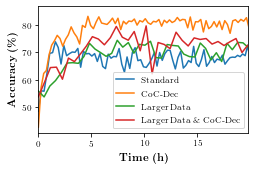

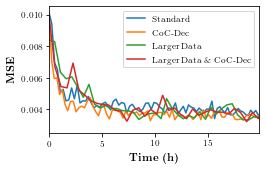

In [46]:
# recurae
plot_training(
    filename="recurae",
    models=[
        "m103067_recurae_depth_4",
        "m104703_recurae_depth_4_cocdepth",
        "m105049_recurae_depth_4_big",
        "m105080_recurae_depth_4_big_cocdepth",
        # "m111370_recurae_depth_4_cocdepth_focdist"
    ],
    labels=[
        "Standard",
        "CoC-Dec",
        "Larger Data",
        "Larger Data \& CoC-Dec",
        # "CoC-Dec \& FocDist"
    ]
)

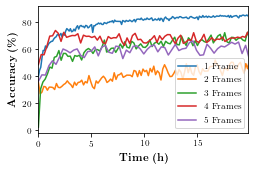

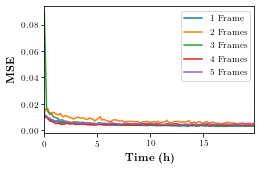

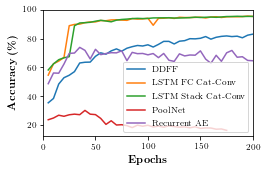

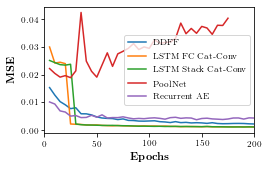

In [10]:
# recurae
plot_training(
    filename="val_all",
    models=[
    "m109375_ddffnew_do_last",
    "m109417_ddffnew_rnn_fc_ccconv",
    "m109416_ddffnew_rnn_stack_ccconv",
    "m109475_poolnew_dir_noch",
    "m103067_recurae_depth_4"
],
labels=[
    "DDFF",
    "LSTM FC Cat-Conv",
    "LSTM Stack Cat-Conv",
    "PoolNet",
    "Recurrent AE",
],
    clamp=0.1
)

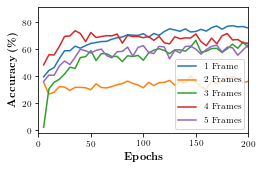

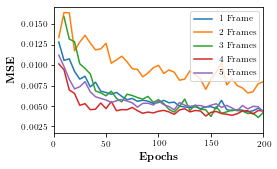

In [12]:
# recurae_numframe
plot_training(
    filename="recurae_numframe",
    models=[
        "m110196_recurae_depth_numframetest_1",
        "m110195_recurae_depth_numframetest_2",
        "m110193_recurae_depth_numframetest_3",
        "m103067_recurae_depth_4",
        "m110194_recurae_depth_numframetest_5"
    ],
    labels=[
        "1 Frame",
        "2 Frames",
        "3 Frames",
        "4 Frames",
        "5 Frames",
    ],
    clamp=0.08
)